In [2]:
# numpy, scipy, pandasのインポート
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# 小数第3位まで表示
%precision 3

'%.3f'

In [3]:
# データ（hier_df）を用意
hier_df= DataFrame(
np.arange(9).reshape((3, 3)),
index = [
['a', 'a', 'b'],
[1, 2, 2]
],
columns = [
['Osaka', 'Tokyo', 'Osaka'],
['Blue','Red','Red']
]
)
hier_df

Osaka Tokyo Osaka
     Blue   Red   Red
a 1     0     1     2
  2     3     4     5
b 2     6     7     8

In [4]:
# ピボット操作で「Blue、Red」の列を行に変更
hier_df.stack()

Osaka  Tokyo
a 1 Blue      0    NaN
    Red       2    1.0
  2 Blue      3    NaN
    Red       5    4.0
b 2 Blue      6    NaN
    Red       8    7.0

In [5]:
# unstackメソッドで、「Blue、Red」の行を列に変更
hier_df.stack().unstack()

Osaka     Tokyo     
     Blue Red  Blue  Red
a 1     0   2   NaN  1.0
  2     3   5   NaN  4.0
b 2     6   8   NaN  7.0

In [6]:
# 重複があるデータ
dupli_data = DataFrame({
'col1': [1, 1, 2, 3, 4, 4, 6, 6],
'col2': ['a', 'b', 'b', 'b', 'c', 'c', 'b', 'b']
})
dupli_data

,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
5,4,c
6,6,b
7,6,b


In [7]:
# 重複の判定
dupli_data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
dtype: bool

In [8]:
# 重複削除
dupli_data.drop_duplicates()

,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
6,6,b


In [9]:
# 参照データ
city_map ={
'Tokyo': 'Kanto',
'Hokkaido': 'Hokkaido',
'Osaka': 'Kansai',
'Kyoto':'Kansai'
}
city_map

{'Tokyo': 'Kanto',
 'Hokkaido': 'Hokkaido',
 'Osaka': 'Kansai',
 'Kyoto': 'Kansai'}

In [10]:
# データ1の準備
data1 = {
'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto',
'Hokkaido', 'Tokyo'],
'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995,
1981],
'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou',
'Suguru','Mitsuo']
}
df1 = DataFrame(data1)
df1

# 参照データを結合．対応するデータがなければ，NaNにする
df1['region'] = df1['city'].map(city_map)
df1

,id,city,birth_year,name,region
0,100,Tokyo,1990,Hiroshi,Kanto
1,101,Osaka,1989,Akiko,Kansai
2,102,Kyoto,1992,Yuki,Kansai
3,103,Hokkaido,1997,Satoru,Hokkaido
4,104,Tokyo,1982,Steeve,Kanto
5,106,Tokyo,1991,Mituru,Kanto
6,108,Osaka,1988,Aoi,Kansai
7,110,Kyoto,1990,Tarou,Kansai
8,111,Hokkaido,1995,Suguru,Hokkaido
9,113,Tokyo,1981,Mitsuo,Kanto


In [11]:
# 分割の粒度
birth_year_bins = [1980, 1985, 1990, 1995, 2000]
# ビン分割の実施
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, right=True)
birth_year_cut_data

0    (1985, 1990]
1    (1985, 1990]
2    (1990, 1995]
3    (1995, 2000]
4    (1980, 1985]
5    (1990, 1995]
6    (1985, 1990]
7    (1985, 1990]
8    (1990, 1995]
9    (1980, 1985]
Name: birth_year, dtype: category
Categories (4, interval[int64, right]): [(1980, 1985] < (1985, 1990] < (1990, 1995] < (1995, 2000]]

In [12]:
# 集計結果
pd.value_counts(birth_year_cut_data)

(1985, 1990]    4
(1990, 1995]    3
(1980, 1985]    2
(1995, 2000]    1
Name: birth_year, dtype: int64

In [13]:
# 名前をつける
group_names = ['A', 'B', 'C', 'D']
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, labels = group_names)
pd.value_counts(birth_year_cut_data)

B    4
C    3
A    2
D    1
Name: birth_year, dtype: int64

In [14]:
# 数字で分割数指定可能。ここでは2つに分割
pd.cut(df1.birth_year, 2)

0      (1989.0, 1997.0]
1    (1980.984, 1989.0]
2      (1989.0, 1997.0]
3      (1989.0, 1997.0]
4    (1980.984, 1989.0]
5      (1989.0, 1997.0]
6    (1980.984, 1989.0]
7      (1989.0, 1997.0]
8      (1989.0, 1997.0]
9    (1980.984, 1989.0]
Name: birth_year, dtype: category
Categories (2, interval[float64, right]): [(1980.984, 1989.0] < (1989.0, 1997.0]]

In [15]:
# サイズ情報
df1.groupby('city').size()

city
Hokkaido    2
Kyoto       2
Osaka       2
Tokyo       4
dtype: int64

In [16]:
# cityを軸に、birth_yearの平均値を求める
df1.groupby('city')['birth_year'].mean()

city
Hokkaido    1996.0
Kyoto       1991.0
Osaka       1988.5
Tokyo       1986.0
Name: birth_year, dtype: float64

In [17]:
# 軸は複数指定可能
df1.groupby(['region', 'city'])['birth_year'].mean()

region    city    
Hokkaido  Hokkaido    1996.0
Kansai    Kyoto       1991.0
          Osaka       1988.5
Kanto     Tokyo       1986.0
Name: birth_year, dtype: float64

In [19]:
df1.groupby(['region', 'city'],
as_index = False)['birth_year'].mean()

,region,city,birth_year
0,Hokkaido,Hokkaido,1996.0
1,Kansai,Kyoto,1991.0
2,Kansai,Osaka,1988.5
3,Kanto,Tokyo,1986.0


In [21]:
for group, subdf in df1.groupby('region'):
    print('==========================================================')
    print('Region Name:', group)
    print(subdf)

Region Name: Hokkaido
    id      city  birth_year    name    region
3  103  Hokkaido        1997  Satoru  Hokkaido
8  111  Hokkaido        1995  Suguru  Hokkaido
Region Name: Kansai
    id   city  birth_year   name  region
1  101  Osaka        1989  Akiko  Kansai
2  102  Kyoto        1992   Yuki  Kansai
6  108  Osaka        1988    Aoi  Kansai
7  110  Kyoto        1990  Tarou  Kansai
Region Name: Kanto
     id   city  birth_year     name region
0   100  Tokyo        1990  Hiroshi  Kanto
4   104  Tokyo        1982   Steeve  Kanto
5   106  Tokyo        1991   Mituru  Kanto
9   113  Tokyo        1981   Mitsuo  Kanto


In [22]:
# データの準備
from numpy import nan as NA
df = pd.DataFrame(np.random.rand(10, 4))
# NAにする
df.iloc[1,0] = NA
df.iloc[2:3,2] = NA
df.iloc[5:,3] = NA
df

,0,1,2,3
0,0.676371,0.213685,0.903131,0.331181
1,NaN,0.922991,0.905377,0.975117
2,0.636947,0.166534,NaN,0.069735
3,0.698159,0.754811,0.920884,0.862317
4,0.382459,0.077771,0.345860,0.145162
5,0.250139,0.984322,0.799003,NaN
6,0.610225,0.168127,0.084330,NaN
7,0.022721,0.037986,0.597943,NaN
8,0.615748,0.398552,0.256143,NaN
9,0.017399,0.929229,0.796482,NaN


In [23]:
df. dropna()

,0,1,2,3
0,0.676371,0.213685,0.903131,0.331181
3,0.698159,0.754811,0.920884,0.862317
4,0.382459,0.077771,0.345860,0.145162


In [24]:
df[[0,1]]. dropna()

,0,1
0,0.676371,0.213685
2,0.636947,0.166534
3,0.698159,0.754811
4,0.382459,0.077771
5,0.250139,0.984322
6,0.610225,0.168127
7,0.022721,0.037986
8,0.615748,0.398552
9,0.017399,0.929229


In [25]:
df. fillna(0)

,0,1,2,3
0,0.676371,0.213685,0.903131,0.331181
1,0.000000,0.922991,0.905377,0.975117
2,0.636947,0.166534,0.000000,0.069735
3,0.698159,0.754811,0.920884,0.862317
4,0.382459,0.077771,0.345860,0.145162
5,0.250139,0.984322,0.799003,0.000000
6,0.610225,0.168127,0.084330,0.000000
7,0.022721,0.037986,0.597943,0.000000
8,0.615748,0.398552,0.256143,0.000000
9,0.017399,0.929229,0.796482,0.000000


In [26]:
df.fillna(method = 'ffill')

,0,1,2,3
0,0.676371,0.213685,0.903131,0.331181
1,0.676371,0.922991,0.905377,0.975117
2,0.636947,0.166534,0.905377,0.069735
3,0.698159,0.754811,0.920884,0.862317
4,0.382459,0.077771,0.345860,0.145162
5,0.250139,0.984322,0.799003,0.145162
6,0.610225,0.168127,0.084330,0.145162
7,0.022721,0.037986,0.597943,0.145162
8,0.615748,0.398552,0.256143,0.145162
9,0.017399,0.929229,0.796482,0.145162


In [27]:
import pandas_datareader.data as pdr

In [28]:
start_date = '2010/1/4'
end_date = '2020/12/30'
fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_date, end_date)
fx_jpusdata.head() # 5行表示

,DEXJPUS
DATE,
2010-01-04,92.55
2010-01-05,91.48
2010-01-06,92.53
2010-01-07,93.31
2010-01-08,92.70


In [29]:
fx_jpusdata['2020-06'] # 2020年6月分

C:\Users\mars2\AppData\Local\Temp\ipykernel_19992\2101987646.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fx_jpusdata['2020-06'] # 2020年6月分


,DEXJPUS
DATE,
2020-06-01,107.56
2020-06-02,108.60
2020-06-03,108.88
2020-06-04,109.00
2020-06-05,109.68
2020-06-08,108.46
2020-06-09,107.66
2020-06-10,107.25
2020-06-11,106.67


In [30]:
fx_jpusdata.resample('M').last().head()# 月末データ

,DEXJPUS
DATE,
2010-01-31,90.38
2010-02-28,88.84
2010-03-31,93.40
2010-04-30,94.24
2010-05-31,90.81


In [31]:
fx_jpusdata.resample('D').last().head(7)

,DEXJPUS
DATE,
2010-01-04,92.55
2010-01-05,91.48
2010-01-06,92.53
2010-01-07,93.31
2010-01-08,92.70
2010-01-09,NaN
2010-01-10,NaN


In [32]:
fx_jpusdata.resample('D').ffill().head(7)

,DEXJPUS
DATE,
2010-01-04,92.55
2010-01-05,91.48
2010-01-06,92.53
2010-01-07,93.31
2010-01-08,92.70
2010-01-09,92.70
2010-01-10,92.70


In [33]:
fx_jpusdata.shift(1).head()

,DEXJPUS
DATE,
2010-01-04,NaN
2010-01-05,92.55
2010-01-06,91.48
2010-01-07,92.53
2010-01-08,93.31


In [34]:
fx_jpusdata_ratio = fx_jpusdata / fx_jpusdata.shift(1)
fx_jpusdata_ratio.head()

,DEXJPUS
DATE,
2010-01-04,NaN
2010-01-05,0.988439
2010-01-06,1.011478
2010-01-07,1.008430
2010-01-08,0.993463


In [35]:
fx_jpusdata.rolling(3).mean().head()

,DEXJPUS
DATE,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,92.186667
2010-01-07,92.440000
2010-01-08,92.846667


In [36]:
# numpy, scipy, pandasのインポート
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
# 小数第３位まで表示
%precision 3

'%.3f'

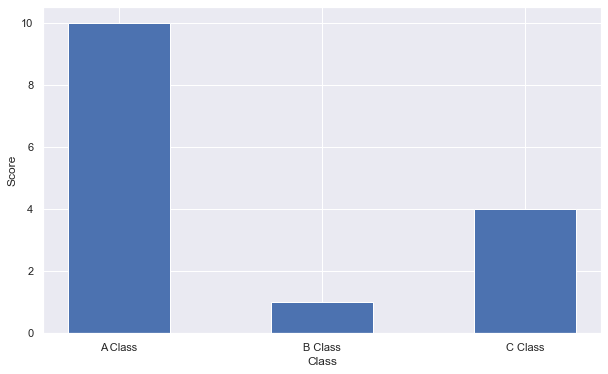

In [37]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]
# グラフの大きさ指定
plt.figure(figsize = (10, 6))
plt.bar(x, y, align='center', width = 0.5)
# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])
# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')
# グリッドを表示
plt.grid(True)

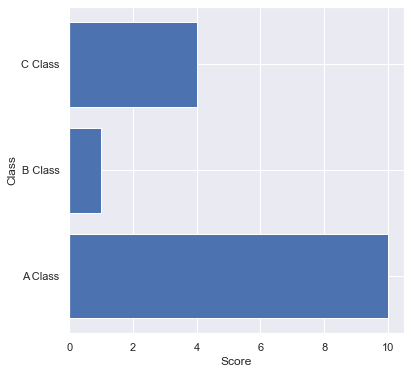

In [38]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]
# グラフの大きさ指定
plt.figure(figsize = (6, 6))
plt.barh(x, y, align = 'center')
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

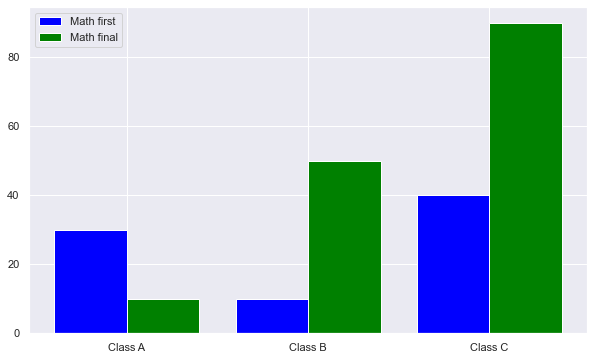

In [39]:
# データの準備
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])
# X軸のデータ
x = np.arange(len(y1))
# グラフの幅
w = 0.4
# グラフの大きさ指定
plt.figure(figsize = (10, 6))
# グラフの描画．y2の方はグラフの幅の分、右にずらして描画する
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')
# 凡例を最適な位置に配置
plt.legend(loc = 'best')
plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

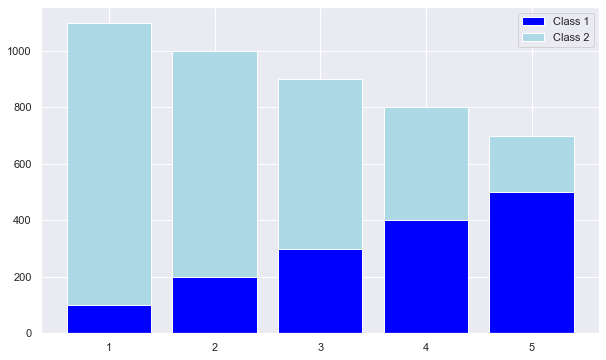

In [40]:
# データの準備
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])
# X軸
x = np.array([1, 2, 3, 4, 5])
# グラフの大きさ指定
plt.figure(figsize = (10, 6))
# グラフの描画
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')
# 凡例を表示
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

(-1.214, 1.135, -1.126, 1.101)

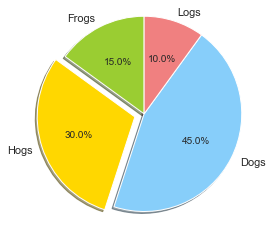

In [41]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
# グラフの大きさ指定
plt.figure(figsize = (4, 4))
# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
autopct = '%1.1f%%', shadow = True, startangle = 90)
# 円を丸く描画
plt.axis('equal')

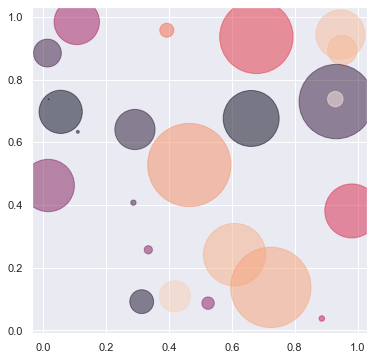

In [42]:
N = 25
# X,Yデータをランダムに生成
x = np.random.rand(N)
y = np.random.rand(N)
# color番号
colors = np.random.rand(N)
# バブルの大きさをばらけさせる
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2
# グラフの大きさ指定
plt.figure(figsize = (6, 6))
# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)